In [1]:
from google.colab import files
uploaded = files.upload()

Saving MetroPT3(AirCompressor).csv to MetroPT3(AirCompressor).csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv('MetroPT3(AirCompressor).csv')
data = data.drop('Unnamed: 0', axis=1)

In [4]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

In [5]:
data['failure'] = 0

In [6]:
data.loc[(data.index>='2020-04-18 00:00:00') & (data.index<='2020-04-18 23:59:00'), 'failure'] = 1
data.loc[(data.index>='2020-05-29 23:30:00') & (data.index<='2020-05-30 06:00:00'), 'failure'] = 1
data.loc[(data.index>='2020-06-05 10:00:00') & (data.index<='2020-06-07 14:30:00'), 'failure'] = 1
data.loc[(data.index>='2020-07-15 14:30:00') & (data.index<='2020-07-15 19:00:00'), 'failure'] = 1

In [7]:
data.head()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,failure
timestamp,,,,,,,,,,,,,,,,
2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


In [8]:
X = data.drop(columns=['failure'])
y = data['failure']

In [9]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming X and y are your features and labels
# X should be a numpy array with your features, and y should be a numpy array with your labels (0 or 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:

# Calculate class weights to handle imbalance
# class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

# Build a simple neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with an appropriate loss function and optimizer
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Train the model with class weights
# model.fit(X_train, y_train, epochs=10, batch_size=32, class_weight={0: class_weights[0], 1: class_weights[1]})
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}')

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate additional metrics
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')


Epoch 1/10
37924/37924 [==============================] - 159s 4ms/step - loss: 0.0103 - accuracy: 0.9962 - precision: 0.8935 - recall: 0.9143
Epoch 2/10
37924/37924 [==============================] - 151s 4ms/step - loss: 0.0069 - accuracy: 0.9974 - precision: 0.9376 - recall: 0.9315
Epoch 3/10
37924/37924 [==============================] - 150s 4ms/step - loss: 0.0064 - accuracy: 0.9976 - precision: 0.9424 - recall: 0.9368
Epoch 4/10
37924/37924 [==============================] - 149s 4ms/step - loss: 0.0061 - accuracy: 0.9978 - precision: 0.9443 - recall: 0.9413
Epoch 5/10
37924/37924 [==============================] - 150s 4ms/step - loss: 0.0060 - accuracy: 0.9978 - precision: 0.9444 - recall: 0.9447
Epoch 6/10
37924/37924 [==============================] - 149s 4ms/step - loss: 0.0059 - accuracy: 0.9978 - precision: 0.9468 - recall: 0.9439
Epoch 7/10
37924/37924 [==============================] - 152s 4ms/step - loss: 0.0056 - accuracy: 0.9979 - precision: 0.9464 - recall: 0.9484

In [ ]:
# Class Weights
class_weights = class_weight.compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))

# New Model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with an appropriate loss function and optimizer
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Train the model with class weights
model.fit(X_train, y_train, epochs=10, batch_size=32, class_weight={0: class_weights[0], 1: class_weights[1]})

# Evaluate the model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}')

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate additional metrics
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')


Epoch 1/10
37924/37924 [==============================] - 162s 4ms/step - loss: 0.0374 - accuracy: 0.9890 - precision_1: 0.6434 - recall_1: 0.9930
Epoch 2/10
37924/37924 [==============================] - 156s 4ms/step - loss: 0.0283 - accuracy: 0.9915 - precision_1: 0.7015 - recall_1: 0.9937
Epoch 3/10
37924/37924 [==============================] - 155s 4ms/step - loss: 0.0257 - accuracy: 0.9924 - precision_1: 0.7236 - recall_1: 0.9939
Epoch 4/10
37924/37924 [==============================] - 157s 4ms/step - loss: 0.0239 - accuracy: 0.9924 - precision_1: 0.7248 - recall_1: 0.9938
Epoch 5/10
37924/37924 [==============================] - 155s 4ms/step - loss: 0.0247 - accuracy: 0.9920 - precision_1: 0.7124 - recall_1: 0.9940
Epoch 6/10
37924/37924 [==============================] - 158s 4ms/step - loss: 0.0249 - accuracy: 0.9921 - precision_1: 0.7160 - recall_1: 0.9942
Epoch 7/10
37924/37924 [==============================] - 156s 4ms/step - loss: 0.0244 - accuracy: 0.9921 - precision_

In [ ]:
# Build a simple neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with an appropriate loss function and optimizer
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Train the model with class weights
# model.fit(X_train, y_train, epochs=10, batch_size=32, class_weight={0: class_weights[0], 1: class_weights[1]})
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}')

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate additional metrics
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')


Epoch 1/10
37924/37924 [==============================] - 157s 4ms/step - loss: 0.0096 - accuracy: 0.9963 - precision_2: 0.9022 - recall_2: 0.9126
Epoch 2/10
37924/37924 [==============================] - 151s 4ms/step - loss: 0.0068 - accuracy: 0.9975 - precision_2: 0.9397 - recall_2: 0.9331
Epoch 3/10
37924/37924 [==============================] - 151s 4ms/step - loss: 0.0063 - accuracy: 0.9977 - precision_2: 0.9428 - recall_2: 0.9392
Epoch 4/10
37924/37924 [==============================] - 151s 4ms/step - loss: 0.0060 - accuracy: 0.9978 - precision_2: 0.9434 - recall_2: 0.9426
Epoch 5/10
37924/37924 [==============================] - 150s 4ms/step - loss: 0.0059 - accuracy: 0.9978 - precision_2: 0.9435 - recall_2: 0.9459
Epoch 6/10
37924/37924 [==============================] - 150s 4ms/step - loss: 0.0058 - accuracy: 0.9979 - precision_2: 0.9456 - recall_2: 0.9462
Epoch 7/10
37924/37924 [==============================] - 150s 4ms/step - loss: 0.0056 - accuracy: 0.9979 - precision_

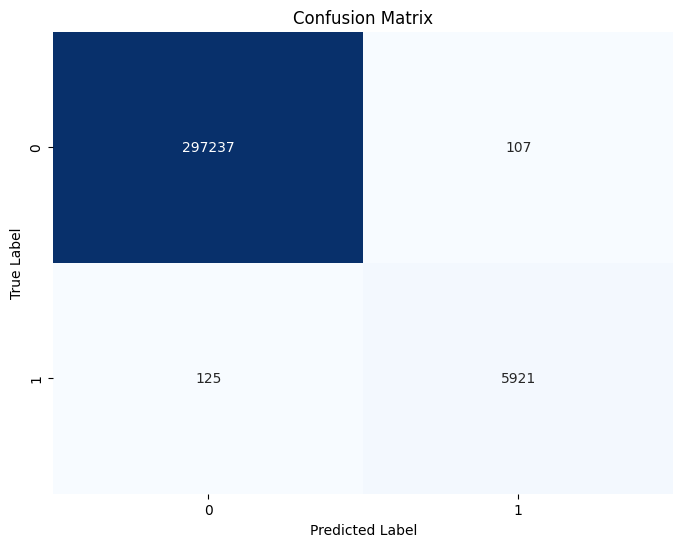

Best Tree Depth: 14
Final Model Accuracy: 0.9992353076897722


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

tree = DecisionTreeClassifier(random_state=42)
depths = np.arange(1, 21)

# Perform cross-validation for each depth
cv_scores = []
for depth in depths:
    tree.set_params(max_depth=depth)
    scores = cross_val_score(tree, X_train, y_train, cv=5)  # 5-fold cross-validation
    cv_scores.append(scores.mean())

# Find the depth with the highest cross-validated score
best_depth = depths[np.argmax(cv_scores)]

# Train the final model with the best depth on the full training set
final_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
final_tree.fit(X_train, y_train)

# Evaluate the final model on the test set
y_pred_final = final_tree.predict(X_test)
accuracy_final = accuracy_score(y_test, y_pred_final)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_final)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print the results
print("Best Tree Depth:", best_depth)
print("Final Model Accuracy:", accuracy_final)


In [11]:
precision_dt = precision_score(y_test, y_pred_final, average='weighted')
recall_dt = recall_score(y_test, y_pred_final, average='weighted')
f1_dt = f1_score(y_test, y_pred_final, average='weighted')

# Print the results
print("Decision Tree Metrics:")
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)
print("\n")


Decision Tree Metrics:
Precision: 0.9992342795002369
Recall: 0.9992353076897722
F1 Score: 0.9992347492580583




In [12]:
precision_dt_class0 = precision_score(y_test, y_pred_final, labels=[0], average='weighted')
recall_dt_class0 = recall_score(y_test, y_pred_final, labels=[0], average='weighted')
f1_dt_class0 = f1_score(y_test, y_pred_final, labels=[0], average='weighted')

precision_dt_class1 = precision_score(y_test, y_pred_final, labels=[1], average='weighted')
recall_dt_class1 = recall_score(y_test, y_pred_final, labels=[1], average='weighted')
f1_dt_class1 = f1_score(y_test, y_pred_final, labels=[1], average='weighted')

print("Decision Tree Metrics - Class 0:")
print("Precision:", precision_dt_class0)
print("Recall:", recall_dt_class0)
print("F1 Score:", f1_dt_class0)
print("\n")

print("Decision Tree Metrics - Class 1:")
print("Precision:", precision_dt_class1)
print("Recall:", recall_dt_class1)
print("F1 Score:", f1_dt_class1)
print("\n")

Decision Tree Metrics - Class 0:
Precision: 0.9995796369408332
Recall: 0.9996401474386569
F1 Score: 0.9996098912740079


Decision Tree Metrics - Class 1:
Precision: 0.9822495023224951
Recall: 0.9793251736685412
F1 Score: 0.9807851581911546




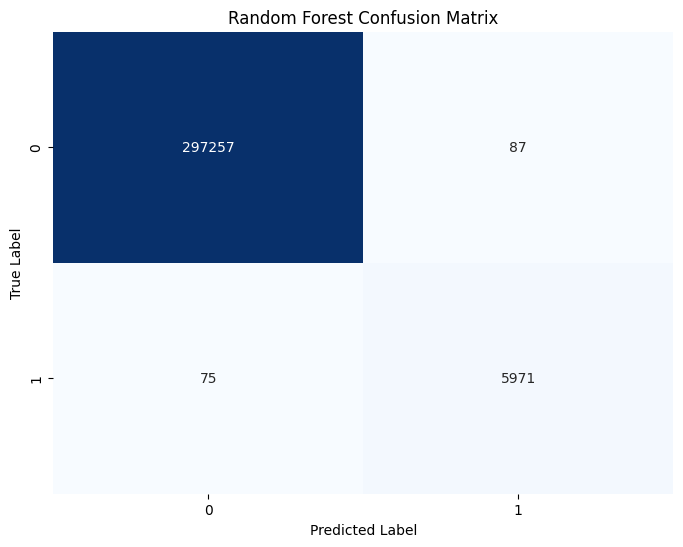

Best Random Forest Model Parameters: {'max_depth': None, 'n_estimators': 200}
Random Forest Accuracy: 0.9994660338178583


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rf = RandomForestClassifier(random_state=42)

# Define a parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_rf = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Calculate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
           )
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print the results
print("Best Random Forest Model Parameters:", grid_search.best_params_)
print("Random Forest Accuracy:", accuracy_rf)

In [14]:
# Random Forest
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("Random Forest Metrics:")
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Random Forest Metrics:
Precision: 0.9994665918691594
Recall: 0.9994660338178583
F1 Score: 0.9994662931195103


In [15]:
precision_rf_class0 = precision_score(y_test, y_pred_rf, labels=[0], average='weighted')
recall_rf_class0 = recall_score(y_test, y_pred_rf, labels=[0], average='weighted')
f1_rf_class0 = f1_score(y_test, y_pred_rf, labels=[0], average='weighted')

precision_rf_class1 = precision_score(y_test, y_pred_rf, labels=[1], average='weighted')
recall_rf_class1 = recall_score(y_test, y_pred_rf, labels=[1], average='weighted')
f1_rf_class1 = f1_score(y_test, y_pred_rf, labels=[1], average='weighted')

print("Random Forest Metrics - Class 0:")
print("Precision:", precision_rf_class0)
print("Recall:", recall_rf_class0)
print("F1 Score:", f1_rf_class0)
print("\n")

print("Random Forest Metrics - Class 1:")
print("Precision:", precision_rf_class1)
print("Recall:", recall_rf_class1)
print("F1 Score:", f1_rf_class1)

Random Forest Metrics - Class 0:
Precision: 0.9997477567163979
Recall: 0.9997074095996556
F1 Score: 0.9997275827509434


Random Forest Metrics - Class 1:
Precision: 0.9856388246946187
Recall: 0.9875951042011247
F1 Score: 0.9866159947124918
